In [1]:
# TODO convert returns to excess returns
# TODO include benchmark in multifactor FF regression -  actually this kind of already happens, it just isn't shown
# TODO remove pyfolio VaR
# TODO rename Sharpe to annual Sharpe

In [2]:
# note: pandas corrects for bias in skew and kurtosis, and by default subtracts 3 from kurtosis (so it's excess kurtosis)

In [1]:
import sys
sys.path.insert(0, r'C:\Users\Kevin\Documents\GitHub\pyfolio_fork_aprm')

In [5]:
import pyfolio_fork_aprm as pf

In [6]:
import utils

In [7]:
import empyrical as ep
import scipy

In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline

C:\Users\Kevin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
two_returns = pd.read_excel('../../Econometrics of Financial Markets/returns.xlsx', 
                        usecols=[0, 1, 3], 
                        index_col=0, 
                        parse_dates=[0]).pct_change().dropna()
two_returns.index = two_returns.index.tz_localize('UTC')
returns = two_returns['Disney']
benchmark = two_returns['SP500 (Rm)']

In [18]:
EXTRA_PERCENT_COLS = ['Annual downside risk', 'Daily expected shortfall', 'Daily historical 5% VaR']

In [8]:
# check equal to downside risk from empyrical
print(np.sqrt(utils.lpm(returns, target_rate=0, order=2)) * np.sqrt(252))
downside_risk_annualised = ep.downside_risk(returns)
downside_risk_annualised

0.11028980397350972


0.11028980397350972

In [9]:
daily_expected_shortfall = utils.expected_shortfall(returns)
daily_expected_shortfall

0.006570516563209849

In [10]:
perf = pf.plotting.show_perf_stats(returns, factor_returns=benchmark, suppress_print=True, 
                              backtest_label_replacement='', return_df=True, suppress_display=True)

In [11]:
print(returns.mean() * 252 / downside_risk_annualised)
ep.sortino_ratio(returns)

0.21463775137041413


0.21463775137041413

In [17]:
historical_5pct_VaR = returns.quantile(0.05)
# this matches with empyrical but not with pyfolio, which returns a theoretical VaR by assuming a normal distribution

In [12]:
pf.timeseries.perf_stats(returns)

Annual return          0.011358
Cumulative returns     0.011267
Annual volatility      0.157684
Sharpe ratio           0.150125
Calmar ratio           0.069578
Stability              0.210795
Max drawdown          -0.163242
Omega ratio            1.027924
Sortino ratio          0.214638
Skew                   0.091982
Kurtosis               4.805310
Tail ratio             0.869223
Daily value at risk   -0.019772
dtype: float64

In [37]:
print((returns.mean() / returns.std()) * np.sqrt(252))
ep.sharpe_ratio(returns)

0.15012520798693332


0.15012520798693332

In [10]:
perf

,
Annual return,1.1%
Cumulative returns,1.1%
Annual volatility,15.8%
Sharpe ratio,0.150125
Calmar ratio,0.0695775
Stability,0.210795
Max drawdown,-16.3%
Omega ratio,1.02792
Sortino ratio,0.214638
Skew,0.0919823


Note: we use sample variance (and sample kurtosis etc) because we are trying to estimate the true variance which is unknown

In [37]:
#perf.to_excel('test.xlsx', float_format='%0.2f')

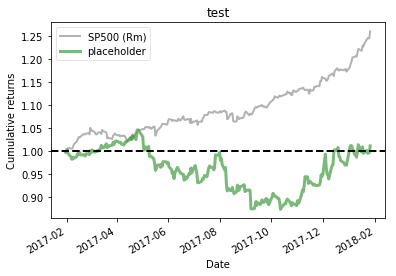

In [104]:
fig, ax = plt.subplots()
ax.set_title('test')
pf.plotting.plot_rolling_returns(returns, benchmark, backtest_label_replacement='placeholder', ax=ax)

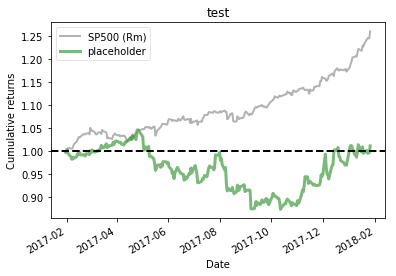

In [107]:
fig

In [87]:
# skip volatility matching
#pf.plotting.plot_rolling_returns(returns, benchmark, volatility_match=True)

In [90]:
# skip plot of returns - who cares?
# pf.plotting.plot_returns(returns)

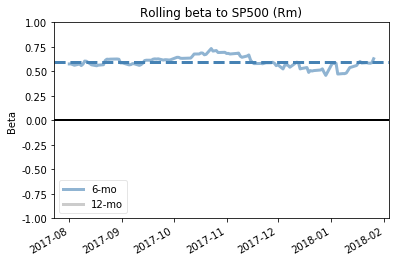

In [95]:
pf.plotting.plot_rolling_beta(returns, benchmark, title='Rolling beta to {}'.format(benchmark.name))

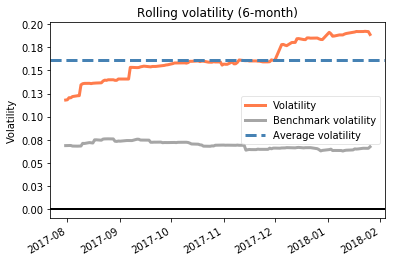

In [93]:
pf.plotting.plot_rolling_volatility(returns, benchmark)

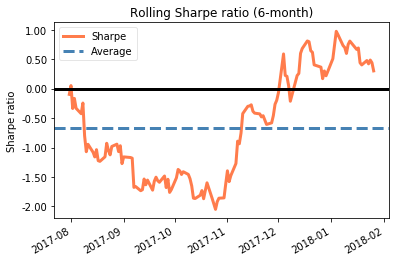

In [96]:
pf.plotting.plot_rolling_sharpe(returns)

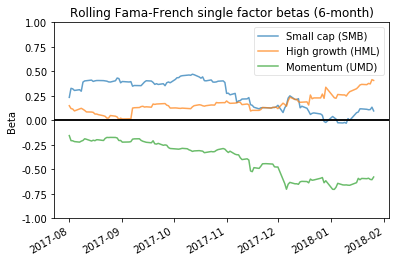

In [97]:
pf.plotting.plot_rolling_fama_french(returns)

Entire data start date: 2017-02-01
Entire data end date: 2018-01-26
In-sample months: 11
Out-of-sample months: 0


,All,In-sample,Out-of-sample
Annual return,1.4%,-0.1%,3989.2%
Cumulative returns,1.4%,-0.1%,1.5%
Annual volatility,15.8%,15.8%,nan%
Sharpe ratio,0.17,0.07,NaN
Calmar ratio,0.09,-0.01,NaN
Stability,0.21,0.22,NaN
Max drawdown,-16.3%,-16.3%,0.0%
Omega ratio,1.03,1.01,NaN
Sortino ratio,0.24,0.10,NaN
Skew,0.09,0.09,0.00


C:\Users\Kevin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.32,2017-04-27,2017-10-12,NaT,NaN
1,2.07,2017-02-01,2017-02-07,2017-03-13,29
2,0.95,2017-04-20,2017-04-24,2017-04-25,4
3,0.85,2017-03-20,2017-03-21,2017-03-28,7
4,0.85,2017-03-31,2017-04-10,2017-04-17,12


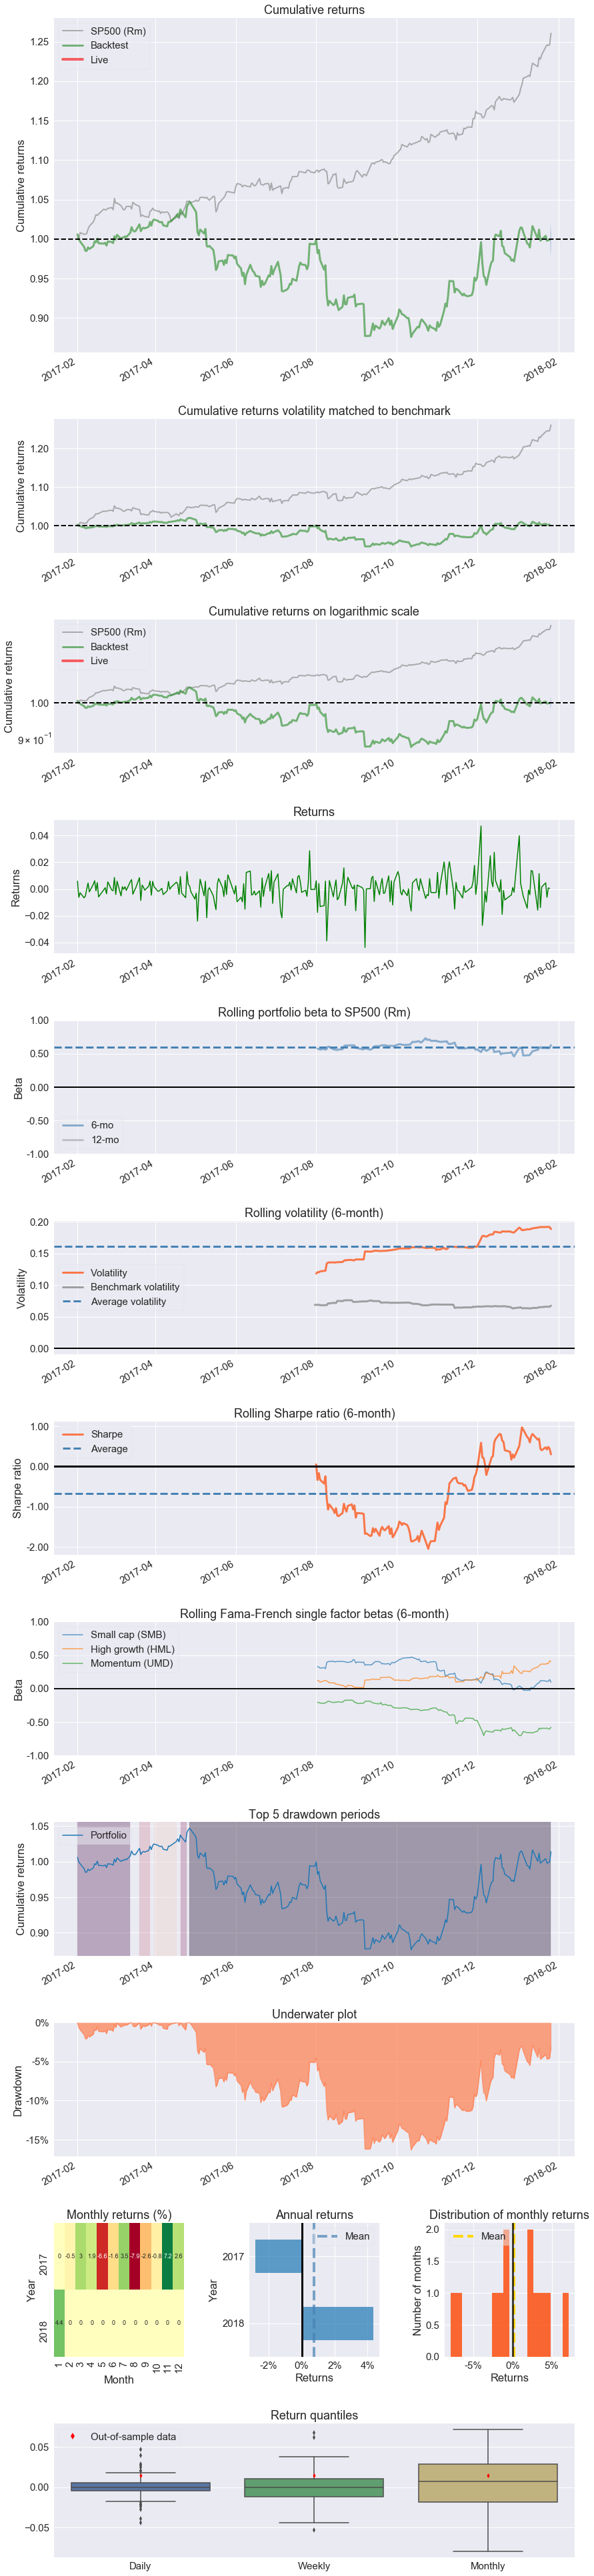

In [12]:
x = pf.create_returns_tear_sheet(returns, benchmark_rets=benchmark, live_start_date=returns.index[-1], return_fig=True)

In [10]:
ff = ep.utils.load_portfolio_risk_factors(start=returns.index[0], end=returns.index[-1])

In [22]:
ff.head()

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2017-01-31 00:00:00+00:00,0.0000,0.0088,-0.0055,0.00002,-0.0071
2017-02-01 00:00:00+00:00,0.0004,-0.0004,0.0003,0.00002,0.0044
2017-02-02 00:00:00+00:00,-0.0002,-0.0026,-0.0031,0.00002,-0.0052
2017-02-03 00:00:00+00:00,0.0082,0.0055,0.0064,0.00002,0.0081
2017-02-06 00:00:00+00:00,-0.0027,-0.0057,-0.0020,0.00002,-0.0027


In [17]:
sm.version.short_version

'0.8.0'

In [12]:
# four-factor Fama-French
sm.OLS(endog=returns - ff['RF'], exog=sm.add_constant(ff[['Mkt-RF', 'SMB', 'HML', 'Mom']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     15.18
Date:                Tue, 03 Apr 2018   Prob (F-statistic):           4.20e-11
Time:                        17:52:44   Log-Likelihood:                 826.42
No. Observations:                 250   AIC:                            -1643.
Df Residuals:                     245   BIC:                            -1625.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.870      0.385      -0.002       0.001
Mkt-RF         0.8780      0.147      5.975      0.000       0.589       1.167
SMB           -0.1232      0.138     -0.890      0.374      -0.396       0.150
HML            0.1769      0.123      1.434      0.153      -0.066       0.420
Mom           -0.6127      0.112     -5.467      0.000      -0.833      -0.392
==============================================================================
Omnibus:                       33.093   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.180
Skew:                          -0.213   Prob(JB):                     1.86e-42
Kurtosis:                       7.274   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""